In [1]:
import BondGraphTools as bgt

In [2]:
model=bgt.new(name='circuit_3')

In [3]:
# Parameters' values

C1_value=1000*1e-6    #(1000 uF)
C2_value=470*1e-6     #(470 uF)
L1_value=100*1e-6     #(100 uH)
R1_value=10*1e3       #(10 k)
R2_value=10*1e3       #(10 k)
R3_value=1*1e3        #(1 k)
R4_value=1*1e3        #(1 k)

In [4]:
E1=bgt.new("C", value=C1_value)
E2=bgt.new("C", value=C2_value)
L1=bgt.new("I", value=L1_value)
R1=bgt.new("R", value=R1_value)
R2=bgt.new("R", value=R2_value)
R3=bgt.new("R", value=R3_value)
R4=bgt.new("R", value=R4_value)

In [5]:
zero_junc=bgt.new("0")
one_junc1=bgt.new("1")
one_junc2=bgt.new("1")

In [6]:
bgt.add(model,E1,E2,L1,R1,R2,R3,R4,zero_junc,one_junc1,one_junc2)

In [7]:
bgt.connect(E1,one_junc1)
bgt.connect(one_junc1,R1)
bgt.connect(one_junc1,R4)
bgt.connect(one_junc1,zero_junc)
bgt.connect(zero_junc,E2)
bgt.connect(zero_junc,one_junc2)
bgt.connect(one_junc2,R2)
bgt.connect(one_junc2,R3)
bgt.connect(one_junc2,L1)

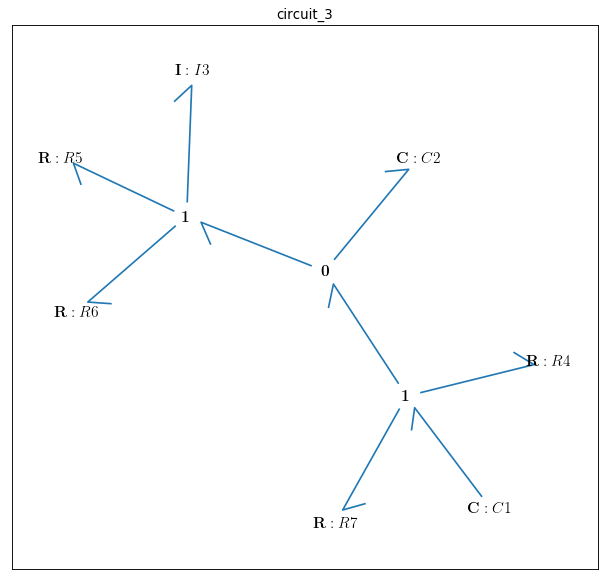

In [20]:
bgt.draw(model)

In [9]:
timespan=[0,100]

In [10]:
model.state_vars

{'x_0': (C: C1, 'q_0'), 'x_1': (C: C2, 'q_0'), 'x_2': (I: I3, 'p_0')}

In [11]:
x0={"x_0":1, "x_1":0, "x_2":0}

In [12]:
model.constitutive_relations

[dx_0 + x_0/11 - 193423597678917*x_1/1000000000000000,
 dx_1 - x_0/11 + 193423597678917*x_1/1000000000000000 + 10000*x_2,
 dx_2 - 212765957446809*x_1/100000000000 + 110000000*x_2]

In [13]:
t, x = bgt.simulate(model, timespan=timespan, x0=x0)

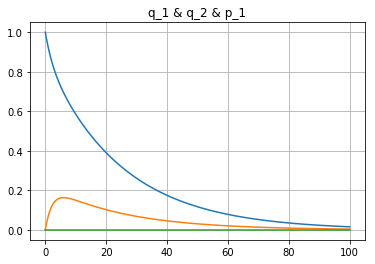

In [14]:
import matplotlib.pyplot as plt
fig=plt.plot(t,x)
plt.title("q_1 & q_2 & p_1")
plt.grid()

Text(0.5,1,'p_1 ZOOM')

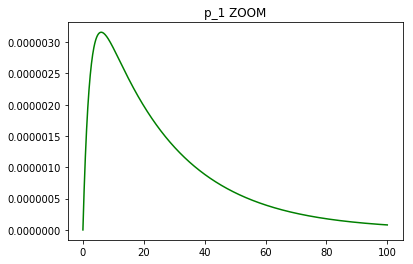

In [15]:
fig=plt.plot(t,x[:,2],'g')
plt.title("p_1 ZOOM")

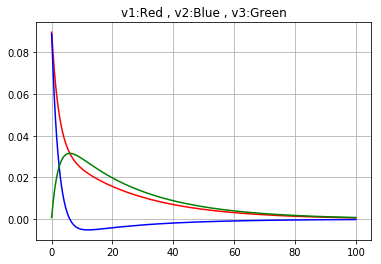

In [16]:
# - dq_1/dt = v1 (current)
import numpy as np
f = np.array(x[:,0], dtype=float)
slope=np.gradient(f,0.1)
v1=-slope
# dq_2/dt = v2 (current)
f = np.array(x[:,1], dtype=float)
slope=np.gradient(f,0.1)
v2=slope
# dq_3/dt = v3 (current)
v3=v1-v2
a3=np.gradient(v3,0.1)


for v, c in [(v1,'r'), (v2,'b'), (v3,'g')]:
    fig=plt.plot(t,v,c)
    plt.title("v1:Red , v2:Blue , v3:Green")
    plt.grid()

In [17]:
u1=x[:,0]/E1._params['C']
u2=R1._params['r']*v1
u3=x[:,1]/E2._params['C']
u4=R4._params['r']*v1
u5=R2._params['r']*v3
u6=L1._params['L']*a3
u7=R3._params['r']*v3



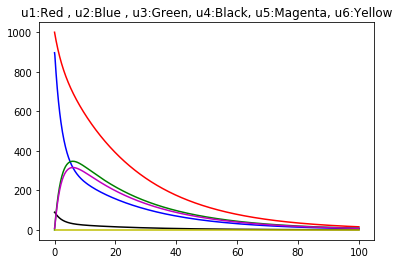

In [18]:
for u, c in [(u1,'r'), (u2,'b'), (u3,'g'), (u4,'k'), (u5,'m'), (u6,'y')]:
    fig=plt.plot(t,u,c)
    plt.title("u1:Red , u2:Blue , u3:Green, u4:Black, u5:Magenta, u6:Yellow")
    plt.grid()
